# Oasis_task_3

Name : Pooja Singh

Domain : Data Science

Project : CAR PRICE PREDICTION WITH MACHINE LEARNING

### Importing Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [96]:
warnings.filterwarnings('ignore')

#### Reading Datasets

In [97]:
car_data=pd.read_csv('car data.csv')

In [98]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


#### Analysing data

In [100]:
car_data.shape

(301, 9)

In [101]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [102]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [103]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


##### Checking for null values

In [104]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

##### No null values found.

##### Checking for duplicate values

In [105]:
car_data.duplicated().sum()

2

##### Droping duplicates

In [106]:
car_data.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


##### Checking correlation

In [107]:
car_data[['Year','Selling_Price','Present_Price','Driven_kms']].corr()

,Year,Selling_Price,Present_Price,Driven_kms
Year,1.000000,0.236141,-0.047192,-0.524342
Selling_Price,0.236141,1.000000,0.878914,0.029187
Present_Price,-0.047192,0.878914,1.000000,0.203618
Driven_kms,-0.524342,0.029187,0.203618,1.000000


##### Checking for unique car brands

In [108]:
car_data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [109]:
car_data['Car_Name'].nunique()

98

##### Finding car with highest and lowest price

In [110]:
car_data.nlargest(1,'Selling_Price')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [111]:
car_data.nsmallest(1,'Selling_Price')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
200,Bajaj Pulsar 150,2006,0.1,0.75,92233,Petrol,Individual,Manual,0


##### Finding average selling price, present price and driven_kms of a car 

In [112]:
car_data[['Selling_Price','Present_Price','Driven_kms']].mean()

Selling_Price        4.661296
Present_Price        7.628472
Driven_kms       36947.205980
dtype: float64

##### Finding average selling price, present price and driven_kms of a car¶ based on fuel

In [113]:
car_data[['Selling_Price','Present_Price','Driven_kms','Fuel_Type']].groupby(['Fuel_Type']).mean()

,Selling_Price,Present_Price,Driven_kms
Fuel_Type,,,
CNG,3.100000,6.415000,42749.000000
Diesel,10.278500,15.814500,50369.916667
Petrol,3.264184,5.583556,33528.937238


### Analysing with the help of plots

##### Relation of attributes

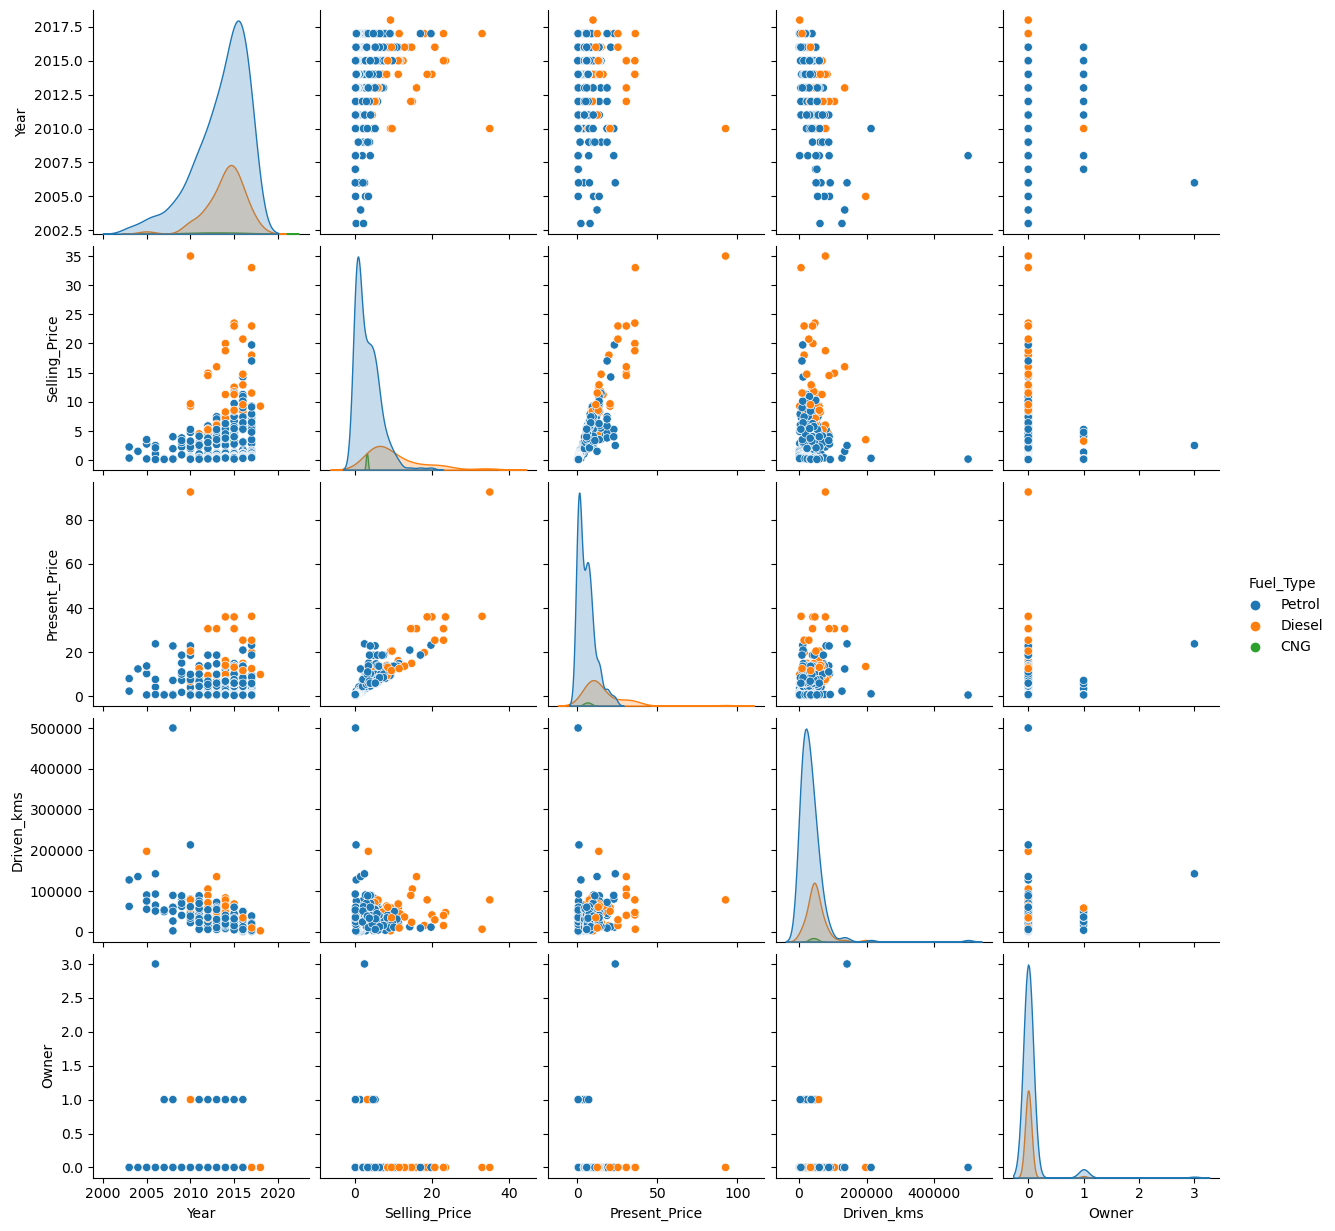

In [114]:
sns.pairplot(data=car_data,hue='Fuel_Type')

##### Correlation of attributes

In [115]:
cor=car_data[['Year','Selling_Price','Present_Price','Driven_kms']].corr()

<Axes: >

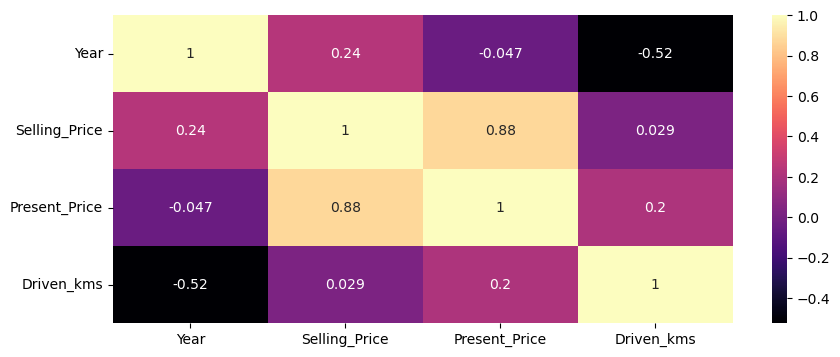

In [116]:
plt.figure(figsize=(10,4))
sns.heatmap(data=cor,annot=True,cmap='magma')

In [117]:
car_data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


##### Average Selling_price based on fuel

In [118]:
mean_data=car_data[['Selling_Price','Fuel_Type']].groupby(['Fuel_Type']).mean().reset_index()

In [119]:
px.bar(data_frame=mean_data,x='Fuel_Type',y='Selling_Price',color='Fuel_Type')

##### Average selling price based on car

In [120]:
data_m=car_data[['Car_Name','Selling_Price']].groupby('Car_Name').mean().reset_index()

In [121]:
px.bar(data_frame=data_m,x='Selling_Price',y='Car_Name',color='Car_Name')

###### Hence we can say that LAND CRUISER have maximum average selling price and FORTUNER has second most maximum average selling price.

## Training Model

### Import Libraries

In [122]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

##### Splitting input and output data

In [123]:
x=car_data[['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']]

In [124]:
x.head()

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0


In [125]:
y=car_data['Selling_Price']

In [126]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

#### Training and spliting training data

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

#### Perfoming tranformation

##### Seperating categorical and numerical data

In [127]:
cat_data=['Car_Name','Fuel_Type','Selling_type','Transmission']
num_data=['Year','Present_Price','Driven_kms','Owner']

In [128]:
char_tran=Pipeline(steps=[('OneHot',OneHotEncoder(handle_unknown='ignore'))])

In [129]:
cat_tran=Pipeline(steps=[('OneHot',OneHotEncoder(handle_unknown='ignore'))])
num_tran=Pipeline(steps=[('scaler',StandardScaler())])
preprocessor=ColumnTransformer(transformers=[('cat',cat_tran,cat_data),('num',num_tran,num_data)])

#### Developing Model

In [130]:
model=Pipeline(steps=[('preprocessor',preprocessor),('regressor',LinearRegression())])

##### Fitting training data in model

In [131]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner'])])),
                ('regressor', LinearRegression())])

##### Making predictions

In [132]:
ypredict=model.predict(x_test)

In [133]:
ypredict

array([ 1.84334514e+00,  1.01323268e+01,  5.85266863e+00, -5.61940436e-01,
        8.37846933e+00,  6.75645558e+00,  1.64563386e+00,  1.53557971e+00,
        7.33834397e-01,  7.49112089e+00,  9.89755600e+00,  6.78343851e-01,
        8.56331293e+00,  3.11348677e+00,  6.82853268e+00,  9.97894011e-01,
        1.22987563e+00,  1.10712084e+01,  2.31141030e+00,  3.37254610e+00,
        9.42295921e-01,  8.67309669e+00,  7.03733288e+00,  2.88832735e+00,
        8.72659377e-01,  3.76450341e+00,  4.99733847e+00,  2.21371525e+00,
        2.95533712e+00,  2.18361344e+00,  1.73359671e-01,  8.84668521e+00,
       -1.51433298e+00,  1.63081512e+00,  8.73853516e+00,  4.04906533e+00,
        4.69702475e+00,  6.10151887e+00,  2.67307112e+00,  6.90780024e+00,
        5.66228595e+00,  1.44026057e-01,  4.38094002e+00, -6.80460349e-01,
        6.83619534e+00, -4.76489578e-02,  8.21715131e+00,  8.65462798e+00,
        4.07717102e+00,  4.40450321e+00,  6.33926705e+00,  3.25066855e+00,
        2.38318631e+01,  

##### Analysing the prediction made by model

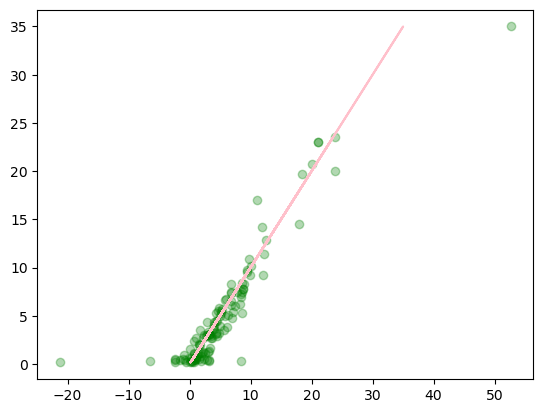

In [134]:
plt.scatter(ypredict,y_test,c='green',alpha=0.3)
plt.plot(y_test,y_test,c='pink')

#### Checking accuracy of predictions

In [135]:
score=mean_squared_error(y_test,ypredict)
score

9.300566583057321

In [136]:
result=r2_score(y_test,ypredict)
result

0.730146677184078

# Making Predictions

In [137]:
car_name=str(input('Enter car name : '))
year=int(input('Enter year : '))
pp=float(input("Enter present price : "))
dk=int(input('Enter driven kms : '))
ft=str(input('Enter fuel type : '))
st=str(input('Enter selling type : '))
trans=str(input('Enter trassmission : '))
own=int(input('Enter owner : '))
i_data=pd.DataFrame([[car_name,year,pp/100000,dk,ft,st,trans,own]],columns=['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner'])
price=model.predict(i_data)
print("Price of car is : ",(price[0]*100000).round(2))

Enter car name : land cruiser
Enter year : 2012
Enter present price : 3420000
Enter driven kms : 2000
Enter fuel type : Diesel
Enter selling type : Dealer
Enter trassmission : Manual
Enter owner : 2
Price of car is :  2182568.67
